# Estimating Proportions

## Index

1. [Introduction](#Introduction)
2. [The Euro Problem](#The-Euro-Problem)
3. [The Binomial Distribution](#The-Binomial-Distribution)
4. [Bayesian Estimation](#Bayesian-Estimation)

## Introduction

In the previous chapter we went through the 101 Bowls problem and showed that it was not about guessing which bowl the cookies came from but rather about estimating proportions. In this chapter we take another step towards Bayesian statistics by solving the Euro Problem.

We will start with the same prior distribution and we will apply the same update mathematically. This problem will introduce another way to choose prior distributions nad using probability to represent the unknown.

## The Euro Problem

The Euro problem was described in the Guardian:

- When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110. A statistics lecturer said that this looked suspicious as the coin is supposed to be unbiased and the chance of getting a result as extreme as this would be less than 7%.
- The qustion is also does the data give evidence that the coin is biased rather than fair.

To anwer the questions we will proceed in two steps, first we will use the binomial distribution to see where that 7% came from and then we'll use Bayes Theorem to estimate the probability that this coin comes up heads.

## The Binomial Distribution

Suppose I tell you that the coin is "fair", that is the probability of heads is 50% and if it is spun twice there will be four outcomes: HH, HT, TT, TH and all four outcomes have an equal probability (25%).

if we add up the total number of heads, there are three possible outcomes (0, 1 or 2). The probability for 0 and 2 is 25% and the chance of 1 head is 50%.

If we look at this in a general view and have the probability of heads as `p` and we spin the coin `n` times and get `k` heads we have the binomial distribution:

$$\binom{n}{k} p^k (1-p)^{n-k}$$

for any value of `k` from 0 to `n` including both. the term $\binom{n}{k}$ is the *binomial coefficient*, usually pronounced "n choose k".

We could evaluate this expression ourselved, but we can also use the SciPy function `binom.pmf`. For example if we flip a coin n=2 time and the probablity of a heads is p=0.5, here is the probability of getting k=1 heads:

In [1]:
from scipy.stats import binom

n = 2
p = 0.5
k = 1

binom.pmf(k, n, p)

0.5

While this is great when we want to evaluate a single experiment we can also pass an array of values instead of a single value for k:

In [2]:
import numpy as np

ks = np.arange(n+1)

ps = binom.pmf(ks, n, p)
ps

array([0.25, 0.5 , 0.25])

The result of the binomial function is a Numpy array with the probability of 0,1 or 2 heads. if we put these probabilities in a Pmf the result is the distribution of k for the given values of n and p:

In [3]:
from empiricaldist import Pmf

pmf_k = Pmf(ps, ks)
pmf_k

,probs
0,0.25
1,0.50
2,0.25


We can make this a lot easier and create a method that will perform all of these steps for the given `n` and `p` values.

In [4]:
def make_binomial (n, p):
    """Make a binomial Pmf."""
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

We cna now see how well this works with n=250 and p = 0.5. (seeing probability of the distribution of heads in 250 spins).

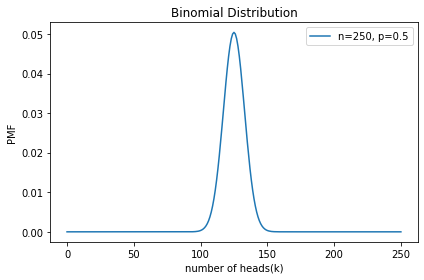

In [12]:
pmf_k = make_binomial(250, 0.5)
import matplotlib.pyplot as plt
def decorate(**options):
    """Decorate the current axes.

    Call decorate with keyword arguments like
    decorate(title='Title',
             xlabel='x',
             ylabel='y')

    The keyword arguments can be any of the axis properties
    https://matplotlib.org/api/axes_api.html
    """
    ax = plt.gca()
    ax.set(**options)

    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels)

    plt.tight_layout()

pmf_k.plot(label="n=250, p=0.5")
decorate(
    xlabel="number of heads(k)",
    ylabel="PMF",
    title="Binomial Distribution"
)

The most likely quantity of heads in the distribution is 125.

In [14]:
pmf_k.max_prob()

125

Even though this has the highest probability it is only a probability of about 5%:

In [16]:
pmf_k[125]

0.05041221314731537

In the article we heard the statistician say that if a coin were unbiased the chance of getting a result an extreme as that would be less than 7%.

We can use the Binomial distribution to check their Math. The following function takes a PMF and computes the total probability of quantities greater than and equal to the threshold:

In [17]:
def prob_ge(pmf, threshold):
    """Probabilities greater than the threshold"""
    ge = (pmf.qs>= threshold)
    total = pmf[ge].sum()
    return total

The probability of getting 140 heads or more:

In [18]:
prob_ge(pmf_k, 140)

0.033210575620022706

We could have also used the following built in Pmf Method:

In [19]:
pmf_k.prob_ge(140)

0.033210575620022706

Both of these results give us the same results but it is differ than the 7% quoted in the original article. The reason for this is due to the fact that the statistician included all of the outcomes "as extreme as" 140, which included outcomes less than or equal to 110.

To see where this comes from, recall that the expected number of heads is 125. If we get 140 we've exceeded that expectation by 15. and if we get 110 we have come up short by 15.

7% is the sum of both of the tails.

Let's get the probability of the left tail:

In [20]:
pmf_k.prob_le(110)

0.033210575620022706

The point of this calculation is that these extreme outcomes are unlikely if the coin is fair.

That's interesting, but it does not answer the question.

## Bayesian Estimation

Any given coin has some probability of landing heads up when spun on edge, we can call this probability $x$. It seems reasonable to believe that $x$ depends on physical characteristics of the coin, like the distribution of weight. If a coin is perfectly balanced, we expect $x$ to be close to 50%, but for a lopsided coin $x$ may be substantially different. We can use bayes theorem and the observed data to estimate $x$.

For simplicity, we start with a uniform prior, which assumes all outcomes are equally likely. This may not be a reasonable assumption so we will come back and consider the other priors later:

In [24]:
hypos = np.linspace(0,1,101)
prior = Pmf(1, hypos)

,probs
0.00,1
0.01,1
0.02,1
0.03,1
0.04,1
...,...
0.96,1
0.97,1
0.98,1
0.99,1
